# Importe

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import statsmodels.api as sm
from uncertainties import ufloat, unumpy as unp
import uncertainties
from uncertainties.unumpy import (nominal_values as n,std_devs as s)


plt.style.use('classic')
plt.rc('text',usetex=True)
plt.rc('axes', labelsize=20) # Schriftgröße der x- und y-Beschriftungen

# Daten laden

In [3]:
A1_df = pd.read_csv('A1.txt',sep='\t')
A2_df = pd.read_csv('A2.txt',sep='\t')
A3_df = pd.read_csv('A3.txt',sep='\t')

# Eigene Funktionen definieren

In [4]:
def reg(x,a,b):
    regg = a*x+b
    return regg
def reg2(x,a,b):
    regg = 1/(a*x-b)
    return regg
def logist(x,a,b,S,D):
    regg = S/(1+np.exp(a*x+b))+D
    return regg

# Aufgabe 1

## Daten Übersicht

In [5]:
A1_df.head()

,Up,Us
0,2.40,0.20
1,3.20,0.50
2,4.00,0.80
3,4.90,1.00
4,6.15,1.35


In [6]:
Up_A1_err = unp.uarray(A1_df['Up'],0.015*A1_df['Up'])
# print(Up_A1_err)
Us_A1_err = unp.uarray(A1_df['Us'],0.015*A1_df['Us'])
print(Us_A1_err)
type(Us_A1_err)

[0.2+/-0.003 0.5+/-0.0075 0.8+/-0.012 1.0+/-0.015 1.35+/-0.02025
 1.65+/-0.024749999999999998 1.9+/-0.028499999999999998 2.2+/-0.033
 2.95+/-0.04425 3.4+/-0.051 3.9+/-0.058499999999999996 4.2+/-0.063
 4.7+/-0.0705 5.0+/-0.075 5.55+/-0.08324999999999999 6.15+/-0.09225]


numpy.ndarray

### Übersetzungsverhältnis
$$ \frac{n_{s}}{n_{p}}  = - \frac{U_{s}}{u_{p}}$$

In [ ]:
Us = np.array(A1_df['Us'])
Up = np.array(A1_df['Up'])
u_Us = 0.01 * Us
u_Up = 0.01 * Up

In [8]:
u_nsnp = np.sqrt(u_Us**2/Up**2 + Us**2/Up**4*u_Up**2)
print(u_nsnp)
print(u_nsnp.mean())

[0.00117851 0.00220971 0.00282843 0.00288615 0.00310437 0.00321856
 0.00327684 0.00340029 0.00344788 0.00348429 0.00351301 0.00349394
 0.00353553 0.00353553 0.00354351 0.00354996]
0.0031379078906301227


In [9]:
nsnp = Us / Up
print(nsnp)
print(nsnp.mean())

[0.08333333 0.15625    0.2        0.20408163 0.2195122  0.22758621
 0.23170732 0.24043716 0.24380165 0.24637681 0.24840764 0.24705882
 0.25       0.25       0.25056433 0.25102041]
0.22188359482033354


In [10]:
n_s_n_p = Us_A1_err/Up_A1_err
n_s_n_p.mean()

0.22188359482033354+/-0.0011992425412235303

### Regression

In [11]:
pop, cov = curve_fit(reg2,n(n_s_n_p), n(Us_A1_err),sigma=s(n_s_n_p))
a_ue,b_ue = pop
da_ue,db_ue = np.sqrt(np.diag(cov))
print(ufloat(a_ue,da_ue))
print(ufloat(b_ue,db_ue))
ufloat(a_ue,da_ue)

(-0+/-5)e+14
(0+/-8)e+13


-36960718.18969339+/-512644095942200.3

### Plot

In [12]:
xx=np.arange(0,7,0.1)
yy = reg2(xx,a_ue,b_ue)

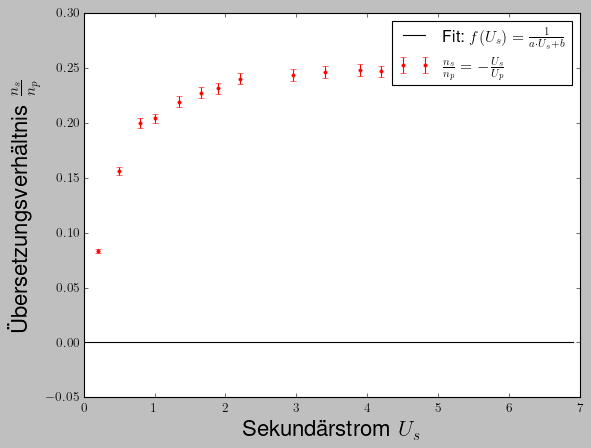

In [13]:
plt.errorbar(n(Us_A1_err),n(n_s_n_p),yerr=s(n_s_n_p),fmt='.r',label=r'$\frac{n_{s}}{n_{p}}=-\frac{U_{s}}{U_{p}}$')
plt.plot(xx,yy,color='k',label=r'Fit: $f(U_{s})= \frac{1}{a\cdot U_{s} + b}$')
plt.ylabel(r'Übersetzungsverhältnis $\frac{n_{s}}{n_{p}}$')
plt.xlabel(r'Sekundärstrom $U_{s}$')
plt.legend()
plt.show()

## Visualisierung

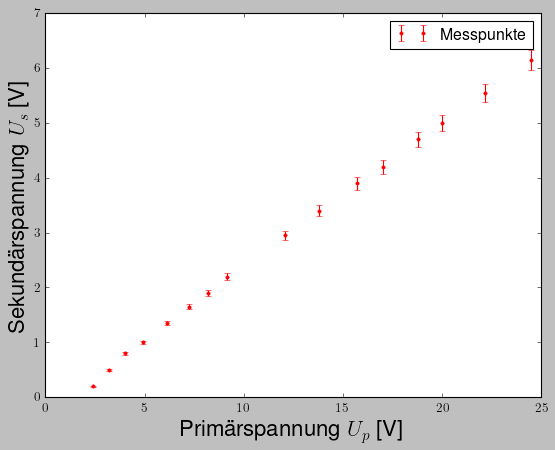

In [14]:
plt.errorbar(A1_df['Up'],A1_df['Us'],fmt='.',color='red',yerr=A1_df['Us']*0.03,label='Messpunkte')#
plt.xlabel(r'Primärspannung $U_p$ [V]')
plt.ylabel(r'Sekundärspannung $U_s$ [V]')
plt.legend()
plt.show()

### Fehlerrechnung

In [15]:
# Frequenz: 50Hz
# Unsicherheit für Spannung: 1% + 2d
# Unsicherheit für Strom: 1.5% + 2d
u_Us = A1_df['Us'] * 0.01
u_Up = A1_df['Up'] * 0.01

### Lineare Regression

In [16]:
pop, cov = curve_fit(reg,A1_df['Up'],A1_df['Us'],sigma=u_Us)
a1,b1 = pop
da1,db1 = np.sqrt(np.diag(cov))
print(f'a: {ufloat(a1,da1) }')
print(f'b: {ufloat(b1,db1)}')

a: 0.284+/-0.006
b: -0.463+/-0.022


In [ ]:
y=A1_df['Us']
x_zunahme=sm.add_constant(A1_df['Up'])
results=sm.WLS(y,x_zunahme,sigma=u_Us).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results.summary())


Lineare Regression

                            WLS Regression Results                            
Dep. Variable:                     Us   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.056e+04
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.41e-23
Time:                        16:29:41   Log-Likelihood:                 25.814
No. Observations:                  16   AIC:                            -47.63
Df Residuals:                      14   BIC:                            -46.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3013      0.02

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['sigma']
  warnings.warn(msg, ValueWarning)
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### chi1

In [18]:
chi_1_1 = np.array(A1_df['Us']-reg(A1_df['Up'],a1,b1))**2/np.array(u_Us)**2
chi_1_1 = chi_1_1.sum()/2
chi_1_1

np.float64(333.5673464049263)

In [19]:
pop, cov = curve_fit(reg,A1_df['Up'][4:],A1_df['Us'][4:],sigma=u_Us[4:])
a1,b1 = pop
da1,db1 = np.sqrt(np.diag(cov))
print(f'a: {ufloat(a1,da1) }')
print(f'b: {ufloat(b1,db1)}')

a: 0.2636+/-0.0015
b: -0.257+/-0.015


#### mit Statsmodels:

In [20]:
y=A1_df['Us'][4:]
x_zunahme=sm.add_constant(A1_df['Up'][4:])
results=sm.WLS(y,x_zunahme,sigma=u_Us[4:]).fit()#,sigma=yerr
print('''
Lineare Regression
''')
print(results.summary())


Lineare Regression

                            WLS Regression Results                            
Dep. Variable:                     Us   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.398e+04
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.37e-20
Time:                        16:29:45   Log-Likelihood:                 29.432
No. Observations:                  12   AIC:                            -54.86
Df Residuals:                      10   BIC:                            -53.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2257      0.01

c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['sigma']
  warnings.warn(msg, ValueWarning)
c:\Users\benjf\anaconda3\envs\projects\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


#### chi2

In [21]:
chi_1_2 = np.array(A1_df['Us'][4:]-reg(A1_df['Up'][4:],a1,b1))**2/np.array(u_Us[4:])**2
chi_1_2 = chi_1_2.sum()/2
chi_1_2

np.float64(3.8737588964990146)

### Plot

In [22]:
ff = np.arange(0,25.5,2.5)
yf = reg(ff,a1,b1)

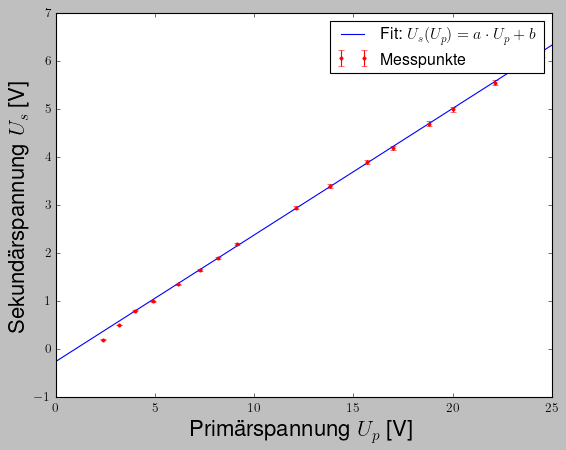

In [23]:
plt.errorbar(A1_df['Up'],A1_df['Us'],fmt='.',color='red',yerr=u_Us,label='Messpunkte')#xerr= u_Up,
plt.plot(ff,yf,label=r'Fit: $U_{s}(U_{p}) = a \cdot U_{p} +b$')
plt.xlabel(r'Primärspannung $U_p$ [V]')
plt.ylabel(r'Sekundärspannung $U_s$ [V]')
plt.legend()
plt.show()

## Übersetzungsverhältnis aus Steigung

In [ ]:
a_err = ufloat(0.2612,0.001)    # + ufloat(0.2257, 0.018)/ufloat(np.array(A1_df['Up'].mean()), 0.01*np.array(A1_df['Up'].mean()))
a_err

0.2612+/-0.001

# Aufgabe 2

## Datenübersicht

In [26]:
A2_df.head()

,P,Ip**,Up
0,4.25,17.73,4.9
1,7.70,22.33,6.9
2,9.45,24.54,7.8
3,11.40,26.81,8.7
4,0.17,33.80,11.2


## Visualisierung Phasenverschiebung

In [27]:
A2_Ip = A2_df['Ip**']*1e-3
IPA2 = np.ones((len(A2_df['Ip**']),len(A2_df['Ip**'])))
for i in range(len(A2_df['Ip**'])):
    IPA2[i] = IPA2[i] * A2_Ip[i]


In [28]:
IPA2

array([[0.01773, 0.01773, 0.01773, 0.01773, 0.01773, 0.01773, 0.01773,
        0.01773, 0.01773, 0.01773, 0.01773],
       [0.02233, 0.02233, 0.02233, 0.02233, 0.02233, 0.02233, 0.02233,
        0.02233, 0.02233, 0.02233, 0.02233],
       [0.02454, 0.02454, 0.02454, 0.02454, 0.02454, 0.02454, 0.02454,
        0.02454, 0.02454, 0.02454, 0.02454],
       [0.02681, 0.02681, 0.02681, 0.02681, 0.02681, 0.02681, 0.02681,
        0.02681, 0.02681, 0.02681, 0.02681],
       [0.0338 , 0.0338 , 0.0338 , 0.0338 , 0.0338 , 0.0338 , 0.0338 ,
        0.0338 , 0.0338 , 0.0338 , 0.0338 ],
       [0.03768, 0.03768, 0.03768, 0.03768, 0.03768, 0.03768, 0.03768,
        0.03768, 0.03768, 0.03768, 0.03768],
       [0.0418 , 0.0418 , 0.0418 , 0.0418 , 0.0418 , 0.0418 , 0.0418 ,
        0.0418 , 0.0418 , 0.0418 , 0.0418 ],
       [0.0637 , 0.0637 , 0.0637 , 0.0637 , 0.0637 , 0.0637 , 0.0637 ,
        0.0637 , 0.0637 , 0.0637 , 0.0637 ],
       [0.0883 , 0.0883 , 0.0883 , 0.0883 , 0.0883 , 0.0883 , 0.0883 ,
 

In [29]:
Phi_A2= np.ones((len(A2_Ip),len(A2_Ip)))
for i in range(len(A2_Ip)):
    Phi_A2[i] = np.arccos(A2_df['P'][i]/(IPA2[i] * A2_df['Up'][i]))


C:\Users\benjf\AppData\Local\Temp\ipykernel_22900\694375513.py:3: RuntimeWarning: invalid value encountered in arccos
  Phi_A2[i] = np.arccos(A2_df['P'][i]/(IPA2[i] * A2_df['Up'][i]))


In [30]:
Phi_A2

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan],
       [1.10507194, 1.10507194, 1.10507194, 1.10507194, 1.10507194,
        1.10507194, 1.10507194, 1.10507194, 1.10507194, 1.10507194,
        1.10507194],
       [1.10703506, 1.10703506, 1.10703506, 1.10703506, 1.10703506,
        1.10703506, 1.10703506, 1.10703506, 1.10703506, 1.10703506,
        1.10703506],
       [1.12757705, 1.12757705, 1.12757705, 1.12757705, 1.

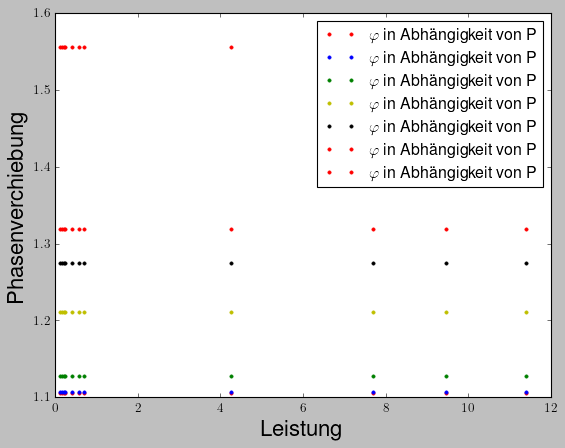

In [31]:
plt.plot(A2_df['P'],Phi_A2[4],'r.',label=r'$\varphi$ in Abhängigkeit von P')
plt.plot(A2_df['P'],Phi_A2[5],'b.',label=r'$\varphi$ in Abhängigkeit von P')
plt.plot(A2_df['P'],Phi_A2[6],'g.',label=r'$\varphi$ in Abhängigkeit von P')
plt.plot(A2_df['P'],Phi_A2[7],'y.',label=r'$\varphi$ in Abhängigkeit von P')
plt.plot(A2_df['P'],Phi_A2[8],'k.',label=r'$\varphi$ in Abhängigkeit von P')
plt.plot(A2_df['P'],Phi_A2[9],'r.',label=r'$\varphi$ in Abhängigkeit von P')
plt.plot(A2_df['P'],Phi_A2[10],'r.',label=r'$\varphi$ in Abhängigkeit von P')
plt.xlabel('Leistung')
plt.ylabel('Phasenverchiebung')
plt.legend()
plt.show()

# Aufgabe 3

In [32]:
A3_df.head()

,P,Up,Ip**,Us,Is
0,-0.15,1.6,8.00,0.0,5
1,22.40,9.0,34.95,2.1,41
2,31.60,10.8,41.10,2.6,50
3,42.50,12.2,46.30,2.9,56
4,0.47,13.5,51.40,3.3,62


In [33]:
Pp = A3_df['P']
Up = A3_df['Up']
Ip_st = A3_df['Ip**']*1e-3
Us = A3_df['Us']
Is = A3_df['Is']*1e-3

## Berechnung der Phasenverschiebung 
$$ P_{p} = U_{p} \cdot I_{p}^{**} \cos(\varphi) $$

In [34]:
cos_phi = np.array(Pp/(Up*Ip_st))
cos_phi

array([-11.71875   ,  71.21284375,  71.19041182,  75.23988245,
         0.67733103,   0.64116418,   0.59921533,   0.57951445,
         0.56132954,   0.52547273,   0.41936714])

In [35]:
phi = np.arccos(cos_phi)
phi

C:\Users\benjf\AppData\Local\Temp\ipykernel_22900\3726694062.py:1: RuntimeWarning: invalid value encountered in arccos
  phi = np.arccos(cos_phi)


array([       nan,        nan,        nan,        nan, 0.82666769,
       0.87478198, 0.9282757 , 0.95266356, 0.97480488, 1.01752569,
       1.13804825])

In [36]:
phi_v2 = phi[4:]
print(len(phi_v2))

7


In [ ]:
Pp_v2 = np.array(Pp[4:])
Up_v2 = np.array(Up[4:])
Ip_st_v2 =np.array(Ip_st[4:])
Us_v2 = np.array(Us[4:])
Is_v2 = np.array(Is[4:])
Is_v2

array([0.062, 0.078, 0.088, 0.095, 0.101, 0.111, 0.141])

## Berechnung der Sekundärleistung
$$ P_{s} =  U_{s} \cdot I_{s}$$

In [38]:
Ps_v2 = Us_v2 * Is_v2
Ps_v2

array([0.2046, 0.3198, 0.4136, 0.475 , 0.5454, 0.6549, 1.0575])

## Wirkungsgrad
 $$ \eta = \frac{P_{s}}{P_{p}} $$

In [39]:
wg_v2 = Ps_v2 / Pp_v2
wg_v2

array([0.43531915, 0.4491573 , 0.46212291, 0.46116505, 0.47633188,
       0.4869145 , 0.48068182])

In [40]:
u_Ps_v2 = 0.01 * Ps_v2
u_Pp_v2 = 0.01 * Pp_v2

In [41]:
Ps_err = unp.uarray(Ps_v2, u_Ps_v2)
Pp_err = unp.uarray(Pp_v2, u_Pp_v2)

In [42]:
Ps_err/Pp_err

array([0.4353191489361702+/-0.006156342443862452,
       0.4491573033707865+/-0.006352043500658929,
       0.4621229050279329+/-0.006535404797737565,
       0.4611650485436893+/-0.006521858661429322,
       0.4763318777292577+/-0.006736350016753591,
       0.486914498141264+/-0.006886010869874647,
       0.4806818181818182+/-0.006797867464588855], dtype=object)

In [43]:
u_wg =  np.sqrt(1/Pp_v2**2 *u_Ps_v2**2+ Ps_v2**2/Pp_v2**4*u_Pp_v2**2)
u_wg.mean()

np.float64(0.006569411107843623)

## Übertragungsfunktion

In [44]:
ubb = Us_v2/Up_v2
ubb.mean()

np.float64(0.2460232163195202)

# Aufgabe 4

## Primärstrom in Abhängigkeit vom Sekundärstrom

In [45]:
plt.errorbar(Is_v2, Ip_st_v2,yerr = Ip_st_v2*0.01,fmt= '.')
plt.ylabel('Primärstrom')
plt.xlabel('Sekundärstrom')

Text(0.5, 0, 'Sekundärstrom')

## Wirkungsgrad in Abhängigkeit vom Sekundärstrom

In [46]:
print(wg_v2)

[0.43531915 0.4491573  0.46212291 0.46116505 0.47633188 0.4869145
 0.48068182]


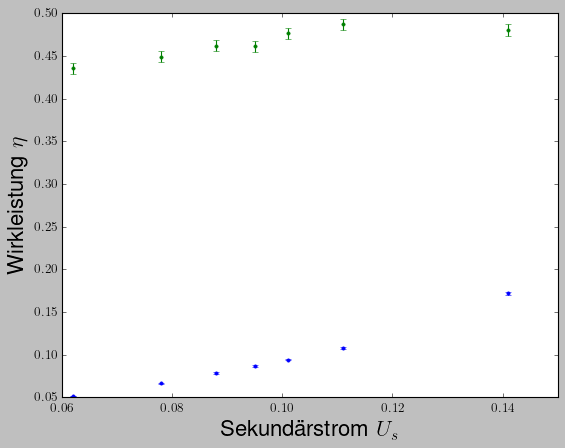

In [47]:
plt.errorbar(Is_v2, wg_v2, fmt='.',yerr= u_wg)
plt.ylabel(r'Wirkleistung $\eta$')
plt.xlabel(r'Sekundärstrom $U_{s}$')
plt.show()

### Regression
$$ y = \frac{S}{1+e^{a \cdot x -b}} $$

In [48]:
S_err = ufloat(0.49, 0.01*0.49)
S = 0.49

pop,cov = curve_fit(logist,Is_v2,wg_v2,sigma= u_wg)
a,b,s,d = pop#
da,db,ds,dd= np.sqrt(np.diag(cov))#
print(a,b)

-100.70930068453012 8.749611400719393


In [49]:
xx = np.arange(0.05,0.166,(0.166-0.05)/30)
yy = logist(xx,a,b,s,d)

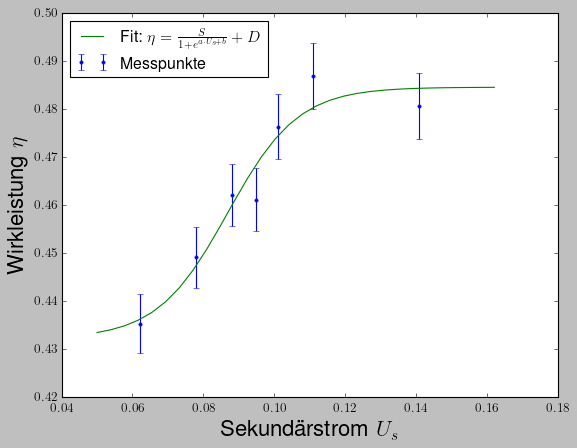

In [50]:
plt.errorbar(Is_v2, wg_v2, fmt='.',yerr= u_wg,label='Messpunkte')
plt.plot(xx,yy,label=r'Fit: $\eta = \frac{S}{1+e^{a\cdot U_s + b}}+D$')
plt.ylabel(r'Wirkleistung $\eta$')
plt.legend(loc=2)
plt.xlabel(r'Sekundärstrom $U_{s}$')
plt.show()

## Phasenverschiebung in Abhängigkeit vom Sekundärstrom

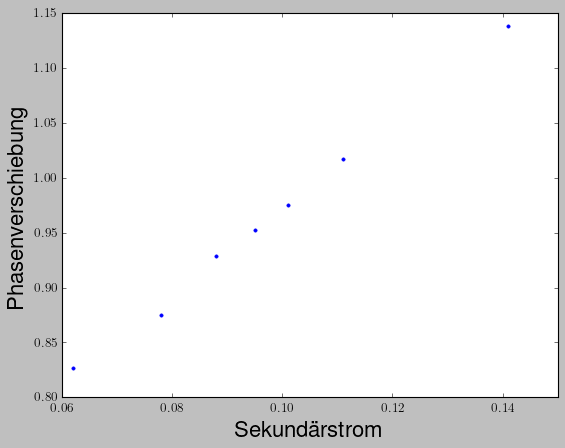

In [51]:
plt.plot(Is_v2, phi_v2, '.')
plt.ylabel('Phasenverschiebung')
plt.xlabel('Sekundärstrom')
plt.show()

# New: Aufgabe 3 Phasenverschiebung:

In [52]:
A3_df.head()

,P,Up,Ip**,Us,Is
0,-0.15,1.6,8.00,0.0,5
1,22.40,9.0,34.95,2.1,41
2,31.60,10.8,41.10,2.6,50
3,42.50,12.2,46.30,2.9,56
4,0.47,13.5,51.40,3.3,62


## Berechnung der Phasenverschiebung 
$$ P_{p} = U_{p} \cdot I_{p}^{**} \cos(\varphi) $$

In [53]:
up = np.array(A3_df['Up'])
print(len(up))
Up_arr =  np.ones((len(up),len(up)))

11


In [54]:
for i in range(11):
    Up_arr[i] = Up_arr[i] * up[i]

In [55]:
Up_arr[0]

array([1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6])

In [56]:
Pp = np.array(A3_df['P'])
Ip_st = np.array(A3_df['Ip**']*1e-3)
Us = np.array(A3_df['Us'])
Is = np.array(A3_df['Is']*1e-3)

In [57]:
cos_phi_arr = np.array(Pp/(Up_arr*Ip_st))
# cos_phi_arr

In [58]:
phi_arr = np.arccos(cos_phi_arr)
# phi_arr

C:\Users\benjf\AppData\Local\Temp\ipykernel_22900\2452064656.py:1: RuntimeWarning: invalid value encountered in arccos
  phi_arr = np.arccos(cos_phi_arr)


## Plot: Phasenverschiebung in Abhängigkeit vom Sekundärstrom

In [ ]:
def reg3(x,a,b,c):
    regg = 1/(a*x+b)+c
    return regg

# pop, cov = curve_fit(reg3, np.array(Ip_st), np.array(phi_arr[10]),sigma = np.array(up[10]))
a,b,c,d = pop
print(a,b,c,d)

-100.70930068453012 8.749611400719393 0.05235347175219003 0.43223248804799724


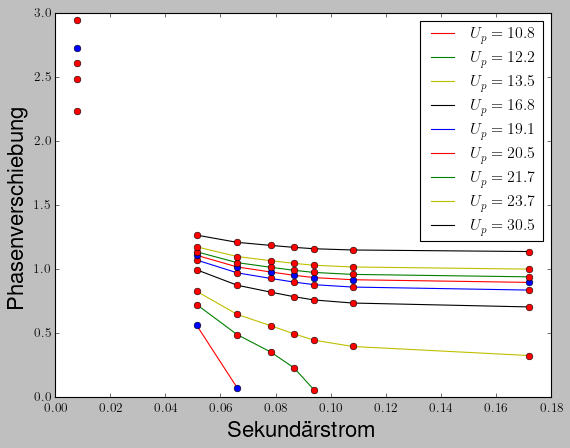

In [62]:
# plt.plot(Ip_st, phi_arr[0], 'k',label='Plot 1')
# #plt.plot(Ip_st, phi_arr[0], 'ro')
# plt.plot(Ip_st, phi_arr[1], 'b',label='Plot 2')
# plt.plot(Ip_st, phi_arr[1], 'ro')
plt.plot(Ip_st, phi_arr[2], 'r',label=fr'$U_p={up[2]}$')
plt.plot(Ip_st, phi_arr[2], 'bo')
plt.plot(Ip_st, phi_arr[3], 'g',label=fr'$U_p={up[3]}$')
plt.plot(Ip_st, phi_arr[3], 'ro')
plt.plot(Ip_st, phi_arr[4], 'y',label=fr'$U_p={up[4]}$')
plt.plot(Ip_st, phi_arr[4], 'ro')
plt.plot(Ip_st, phi_arr[5], 'k',label=fr'$U_p={up[5]}$')
plt.plot(Ip_st, phi_arr[5], 'ro')
plt.plot(Ip_st, phi_arr[6], 'b',label=fr'$U_p={up[6]}$')
plt.plot(Ip_st, phi_arr[6], 'ro')
plt.plot(Ip_st, phi_arr[7], 'r',label=fr'$U_p={up[7]}$')
plt.plot(Ip_st, phi_arr[7], 'bo')
plt.plot(Ip_st, phi_arr[8], 'g',label=fr'$U_p={up[8]}$')
plt.plot(Ip_st, phi_arr[8], 'ro')
plt.plot(Ip_st, phi_arr[9], 'y',label=fr'$U_p={up[9]}$')
plt.plot(Ip_st, phi_arr[9], 'ro')
plt.plot(Ip_st, phi_arr[10], 'k',label=fr'$U_p={up[10]}$')
plt.plot(Ip_st, phi_arr[10], 'ro')
plt.ylabel('Phasenverschiebung')
plt.xlabel('Sekundärstrom')
plt.legend()
plt.show()

Unter der Annhame, dass die Einzelwerte von $U_{p}$ konstant in Bezug auf die restliche Messung sind. Dies führt zu der obigen Grafik. Die ersten 4-5 Plots sind zu vernachlässigen, aufgrund der geringeren Datenpunktmenge und des Verlaufs. Das Fehlen von Datenpunkten ist damit zu erklären dass der Term  
$$ \frac{P_{p}}{ U_{p} \cdot I_{p}^{**}}$$ ausßerhalb des Definitionsbereich $[-1,1]$ vom $\arccos$ liegen und somit nicht berechnet werden können.  
Die Annahme ist an sich nicht korrekt, weil wir während der Messung die Spannung nicht konstant gehalten haben, sondern verändert haben und den Verbraucher konstant gehalten haben. Das heißt, wir haben eine Phasenverschiebung unter konstatem Verbraucher und konstanter Spannung. Die Messung müsste nochmal wiederholt werden, um die Verläufe in der obigen Grafik zu validieren.